<a href="https://colab.research.google.com/github/ctclumak/Tensorflow-2-and-Keras-Deep-Learning/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autoencoder for Dimensionality Reduction**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples=300,
                  n_features = 2,
                  centers = 2,
                  cluster_std = 1.0,
                  random_state=101)  #n_samples is row number you want, centers is the cluster number you want)

In [0]:
X,y = data

In [0]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [19]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [0]:
feat = pd.DataFrame(X)

In [0]:
# concat the features with z_noise
feat = pd.concat([feat,z_noise],axis =1)

In [0]:
feat.columns = ['X1', 'X2','X3']

In [23]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


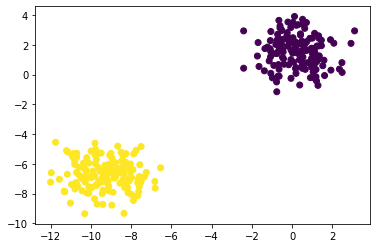

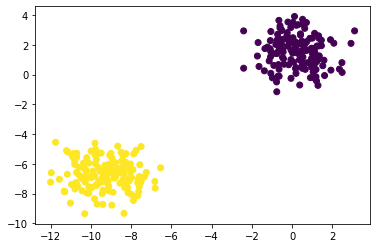

In [24]:
plt.scatter(feat['X1'],feat['X2'], c=y)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

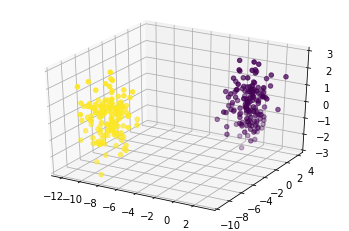

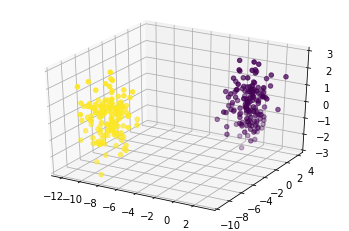

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'], c=y )

In [0]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
from tensorflow.keras.optimizers import SGD

In [29]:
# create and encoder  3----> 2-------> 3
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation='relu', input_shape=[2]))

In [0]:
autoencoder = Sequential([encoder,decoder])

In [0]:
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [36]:
autoencoder.fit(scaled_data, scaled_data,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 0s 2ms/sample - loss: 0.2646
Epoch 2/5
300/300 [==============================] - 0s 61us/sample - loss: 0.2294
Epoch 3/5
300/300 [==============================] - 0s 54us/sample - loss: 0.2451
Epoch 4/5
300/300 [==============================] - 0s 50us/sample - loss: 0.2365
Epoch 5/5
300/300 [==============================] - 0s 49us/sample - loss: 0.1826


In [0]:
encoded_2dim=encoder.predict(scaled_data)

In [39]:
encoded_2dim.shape

(300, 2)

In [40]:
scaled_data.shape

(300, 3)

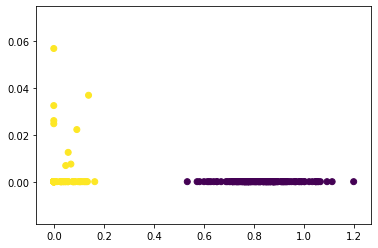

In [44]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)